In [1]:
import json

In [2]:
dic = json.load(open("accuracy_formatted.json", 'r'))

In [3]:
import pandas as pd

In [4]:
arr = []

In [5]:
for key in sorted(dic.keys()):
    arr.append(dic[key])

In [6]:
df = pd.DataFrame(arr)

In [7]:
df['label'] = df['model'] + '/' + df['dataset']

In [8]:
df.sort_values('label')[['accuracy', 'label']]

,accuracy,label
11,0.273750,CNN/BFW Balanced
7,0.322000,CNN/BFW Probabilistic
16,0.334146,CNN/BFW Probabilistic [25%]
17,0.859091,CNN/LFW
21,0.500000,CNN/TA Data
3,0.939394,CNN/Yale Data
8,0.192500,Eigenfaces/BFW Balanced
4,0.200000,Eigenfaces/BFW Probabilistic
13,0.253659,Eigenfaces/BFW Probabilistic [25%]
0,0.600000,Eigenfaces/LFW


In [9]:
df.head()

,accuracy,model,dataset,race_accuracy,gender_accuracy,demographic_accuracy,hyperparams,proportions,label
0,0.600000,Eigenfaces,LFW,{},{},{},"{'n_components': 50, 'C': 1}",{},Eigenfaces/LFW
1,0.395455,Fisherfaces,LFW,{},{},{},{'num_features': 50},{},Fisherfaces/LFW
2,0.757576,LBPH,Yale Data,{},{},{},"{'size': 50, 'metric': 'ChiSquare', 'radius': 1}",{},LBPH/Yale Data
3,0.939394,CNN,Yale Data,{},{},{},{'epochs': 100},{},CNN/Yale Data
4,0.200000,Eigenfaces,BFW Probabilistic,"{'white': 0.1642512077294686, 'black': 0.19, '...","{'males': 0.245136186770428, 'females': 0.1522...","{'white_males': 0.21359223300970873, 'black_fe...","{'n_components': 50, 'C': 1}","{'asian_females': 0.1, 'asian_males': 0.1, 'bl...",Eigenfaces/BFW Probabilistic


<Axes: xlabel='label'>

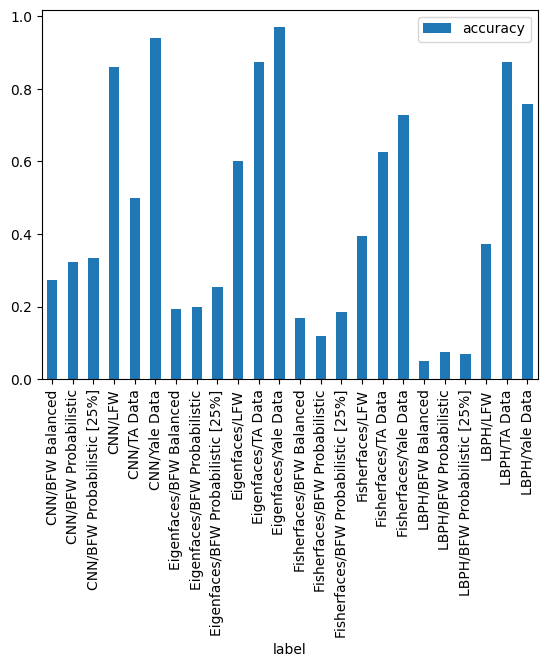

In [10]:
df.sort_values('label').plot(x='label', y='accuracy', kind='bar')

<Axes: xlabel='model', ylabel='accuracy average across four datasets'>

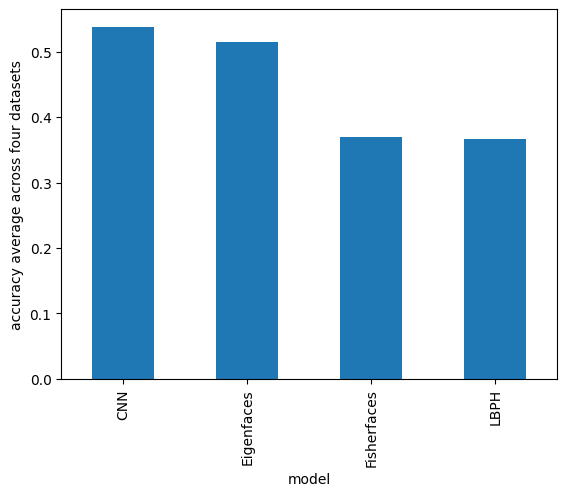

In [11]:
df.groupby("model").accuracy.mean().plot(kind='bar', ylabel='accuracy average across four datasets')

In [12]:
races = ['black', 'white', 'asian', 'indian']
genders = ['males', 'females']
demographics = ['black_males', 'white_males', 'asian_males', 'indian_males', 'black_females', 'white_females', 'asian_females', 'indian_females']

In [13]:
for race in races:
    arr = []
    for row in df.iterrows():
        if row[1].race_accuracy:
            arr.append(row[1].race_accuracy[race])
        else:
            arr.append(None)
    df[race] = arr

In [14]:
for gender in genders:
    arr = []
    for row in df.iterrows():
        if row[1].gender_accuracy:
            arr.append(row[1].gender_accuracy[gender])
        else:
            arr.append(None)
    df[gender] = arr

In [15]:
for demographic in demographics:
    arr = []
    for row in df.iterrows():
        if row[1].demographic_accuracy:
            arr.append(row[1].demographic_accuracy[demographic])
        else:
            arr.append(None)
    df[demographic] = arr

In [16]:
df.dataset

0                         LFW
1                         LFW
2                   Yale Data
3                   Yale Data
4           BFW Probabilistic
5           BFW Probabilistic
6           BFW Probabilistic
7           BFW Probabilistic
8                BFW Balanced
9                BFW Balanced
10               BFW Balanced
11               BFW Balanced
12                        LFW
13    BFW Probabilistic [25%]
14    BFW Probabilistic [25%]
15    BFW Probabilistic [25%]
16    BFW Probabilistic [25%]
17                        LFW
18                    TA Data
19                    TA Data
20                    TA Data
21                    TA Data
22                  Yale Data
23                  Yale Data
Name: dataset, dtype: object

# BFW Balanced

<Axes: xlabel='model'>

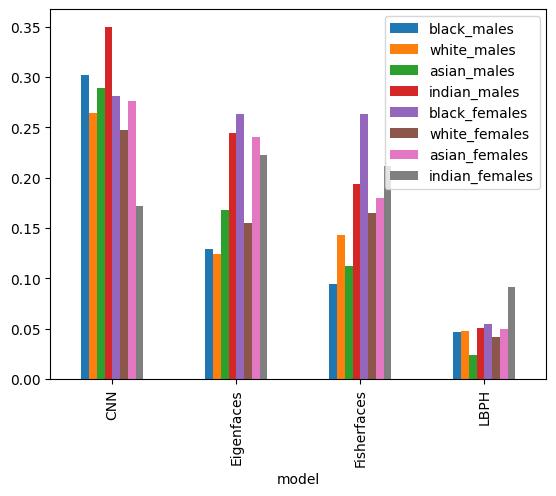

In [19]:
# Demographic Accuracy Chart, Faceted by Implementation Method
df.loc[df.dataset == 'BFW Balanced'].groupby('model')[demographics].mean().plot(kind='bar')

<Axes: >

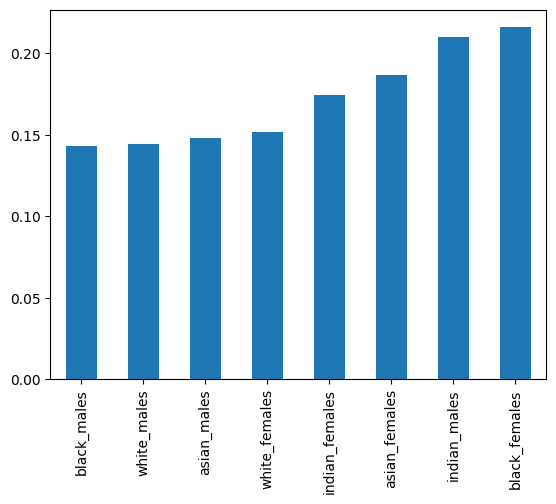

In [21]:
# Demographic Accuracy Chart Across All Implementations
df.loc[df.dataset == 'BFW Balanced'][demographics].mean().sort_values().plot(kind='bar')

<Axes: xlabel='model'>

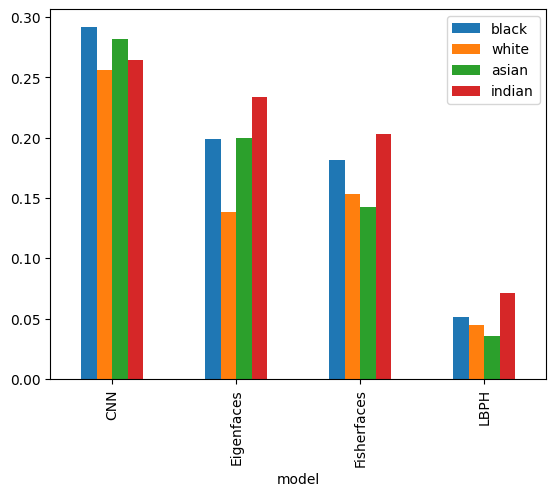

In [26]:
# Racial Accuracy Chart, Faceted by Implementation Method
df.loc[df.dataset == 'BFW Balanced'].groupby('model')[races].mean().plot(kind='bar')

<Axes: xlabel='model'>

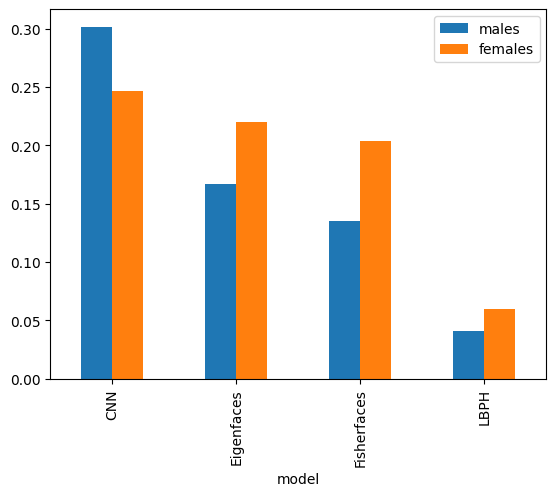

In [27]:
# Gender Accuracy Chart, Faceted by Implementation Method
df.loc[df.dataset == 'BFW Balanced'].groupby('model')[genders].mean().plot(kind='bar')

# BFW Unbalanced

<Axes: xlabel='model'>

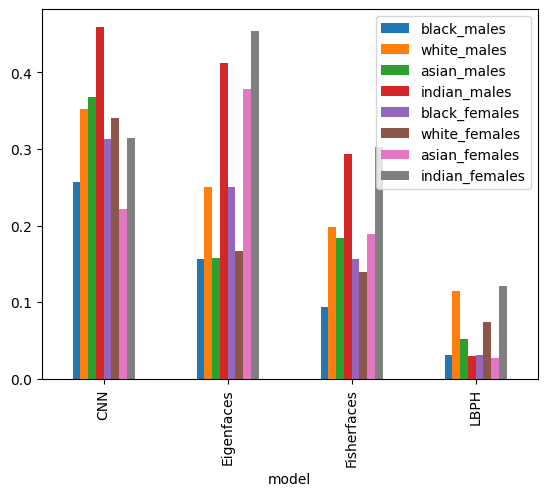

In [28]:
df.loc[df.dataset == 'BFW Probabilistic [25%]'].groupby('model')[demographics].mean().plot(kind='bar')

<Axes: >

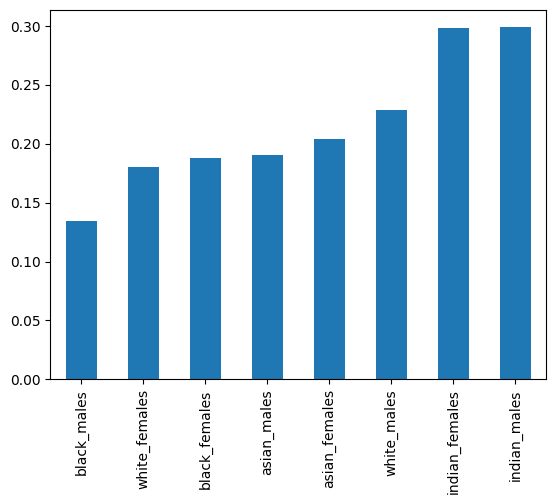

In [29]:
# Demographic Accuracy Chart Across All Implementations
df.loc[df.dataset == 'BFW Probabilistic [25%]'][demographics].mean().sort_values().plot(kind='bar')

<Axes: xlabel='model'>

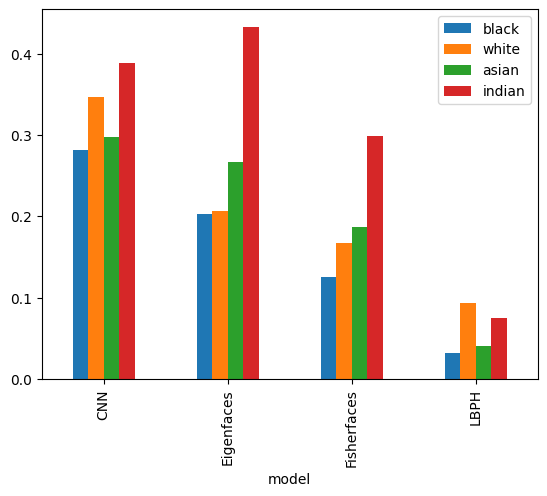

In [30]:
# Racial Accuracy Chart, Faceted by Implementation Method
df.loc[df.dataset == 'BFW Probabilistic [25%]'].groupby('model')[races].mean().plot(kind='bar')